In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 2))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
#         print(widths)
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

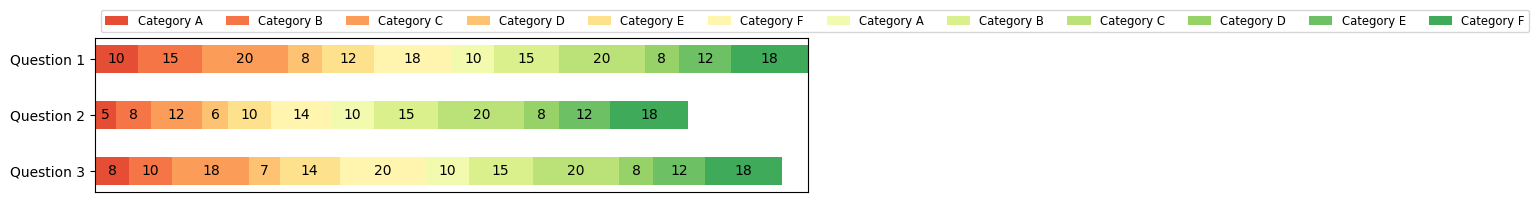

In [3]:
category_names = ["Category A", "Category B", "Category C", "Category D", "Category E", "Category F"
                  ,"Category A", "Category B", "Category C", "Category D", "Category E", "Category F"]

results = {
    "Question 1": [10, 15, 20, 8, 12, 18,10, 15, 20, 8, 12, 18],
    "Question 2": [5, 8, 12, 6, 10, 14,10, 15, 20, 8, 12, 18],
    "Question 3": [8, 10, 18, 7, 14, 20,10, 15, 20, 8, 12, 18]
}
fig, ax = survey(results, category_names)
plt.show()